Exercise One

In [2]:
import os
import warnings

from rich.jupyter import display

# Suppress TensorFlow logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Disable oneDNN custom operations
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# Suppress other library warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

red_wine = pd.read_csv("../data/winequality-red.csv")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

In [5]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

print(X_train.shape)

(1119, 11)


In [6]:
import tensorflow as tf
from tensorflow.keras import layers
import os
# Suppress TensorFlow logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Disable oneDNN custom operations
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# Suppress other library warnings
warnings.filterwarnings('ignore')

# Configure TensorFlow to use only the CPU
tf.config.set_visible_devices([], 'GPU')

model = tf.keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

In [13]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [14]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.3650 - val_loss: 0.1354
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1442 - val_loss: 0.1262
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1333 - val_loss: 0.1194
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1174 - val_loss: 0.1141
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1095 - val_loss: 0.1083
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1094 - val_loss: 0.1052
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1086 - val_loss: 0.1103
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1073 - val_loss: 0.1019
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1054 - val_loss: 0.1044
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1047 - val_loss: 0.1022


<Axes: >

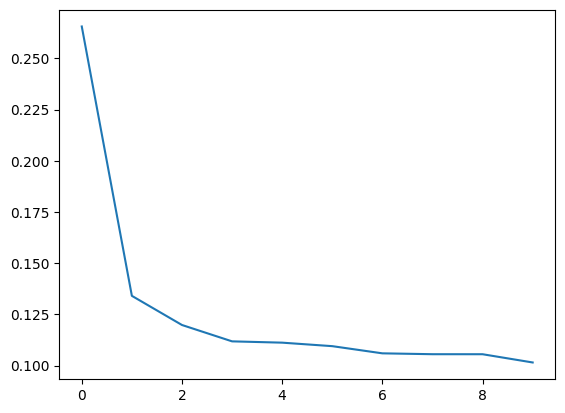

In [11]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()